In [27]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'

data=pd.read_csv("StatsCan_projections/Summary_sommaire_2015_2024.csv",encoding='latin-1')
#imports the summary csv file with job projection data       
    

#The following picks out English columns and avoids French ones which are duplicates
df=data[['Code', 'Occupation_Name',
       'Employment_emploi_2014', 'Employment_Growth_croissance_emploi',
       'Retirements_retraites', 'Other_Replacement_autre_remplacement',
       "Total_Job_Openings_Perspective_d'emploi",
       'School_Leavers_Sortants_scolaires', 'Immigration',
       'Other_Seekers_autres_chercheurs', 'Job_Seekers_Chercheurs_emploi',
       'Recent_Labour_Market_Conditions',
       'Future_Labour_Market_Conditions']]

#Renamed columns for easier understanding and interpretation
df.columns=['code', 'occupation_name',
       'employment_2014', 'employment_growth',
       'retirements', 'other_replacement',
       "total_job_openings",
       'school_leavers', 'immigration',
       'other_seekers', 'total_job_seekers',
       'recent_labour_market_conditions',
       'future_labour_market_conditions']

#Slice out dataset for skill levels, 0,A-D
#Removed last two columns due to being unnecessary (N/A)
skill_level_summary=df[:6]
skill_level_summary=skill_level_summary[['code', 'occupation_name', 'employment_2014', 'employment_growth',
       'retirements', 'other_replacement', 'total_job_openings',
       'school_leavers', 'immigration', 'other_seekers', 'total_job_seekers']]


#Slice out dataset for skill type, 1-9
#Removed last two columns due to being unnecessary (N/A)
skill_type_summary=df[6:16]
skill_type_summary=skill_type_summary[['code', 'occupation_name', 'employment_2014', 'employment_growth',
       'retirements', 'other_replacement', 'total_job_openings',
       'school_leavers', 'immigration', 'other_seekers', 'total_job_seekers']]

#Slice out all the NOC Codes available
all_skill_levels=df[16:]
#Create new column for the skill level as determined by the first 2 digits of the NOC code
all_skill_levels.loc[:,'skill_level']=all_skill_levels.code.str[1:3]


def getSkillLevel(code):
    '''Takes an input of the skill_level (str) and determines the appropriate NOC Code
    code must be entered as a string'''
    A=['0','1']
    B=['2','3']
    C=['4','5']
    D=['6','7']
    
    if code[0]=='0':
        return "NOC 0"
    elif code[1] in A:
        return "NOC A"
    elif code[1] in B:
        return "NOC B"
    elif code[1] in C:
        return "NOC C"
    elif code[1] in D:
        return "NOC D"
    else:
        return "Error"
    
#Create new column to store the NOC code
all_skill_levels['NOC'] = list(map(getSkillLevel, all_skill_levels['skill_level']))

#New column to store the net job openings
difference=all_skill_levels['total_job_openings']-all_skill_levels['total_job_seekers']
all_skill_levels['net_jobs']=difference

#Sort the jobs based on number of net job openings (Highest at the top)
all_skill_levels_sorted=all_skill_levels.sort_values('net_jobs', ascending=False, inplace=False, na_position='last')


def goodGraphs(df,df_plot,title,sizeLimit):
    '''Breaks down the dataFrame to develop subplots for easier reading and analysis
    Takes input of df(full dataFrame), df_plot(containes only index and net jobs numbers), title (str) and 
    sizeLimit(preferred number of codes per graph)
    
    Sample function call code --> goodGraphs(noc_B,noc_B_plot,'NOC B Projections',30)'''
    
    num_rows=len(df.index) #Counts the number of rows
    if sizeLimit>num_rows:
        sizeLimit=num_rows
     
    row_quotient=num_rows//sizeLimit
    row_modulus=num_rows%sizeLimit
    
    split_df=np.array_split(df, row_quotient) #This is an array that can be iterated through
    split_df_plot=np.array_split(df_plot,row_quotient)
    
    x=[] #Stores the number of rows for each split dataFrame
    
    #fig = plt.figure(figsize=(6, 4))
    
    #Iterate of split dataFrame to obtain subplots with corresponding labels
    for i in range(row_quotient):
        x.append(split_df[i].shape[0])
        plt.figure(figsize=(6, 4))
        
        split_df_plot[i].plot.bar()
        plt.xlabel('NOC Codes')
        plt.ylabel('Net jobs')
        plt.xticks(np.arange(0,len(split_df_plot[i].index)), split_df[i].code, rotation='vertical')
        plt.title(title)

    return x,num_rows

([29], 29)

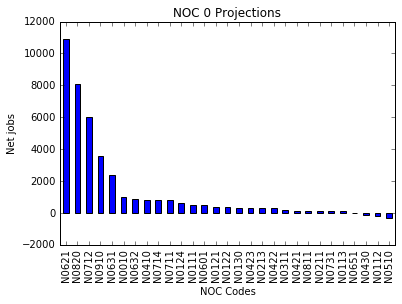

In [28]:
noc_0=all_skill_levels_sorted[all_skill_levels_sorted.NOC == "NOC 0"]
noc_0_plot=noc_0['net_jobs']
goodGraphs(noc_0,noc_0_plot,'NOC 0 Projections',29)

([30, 29], 59)

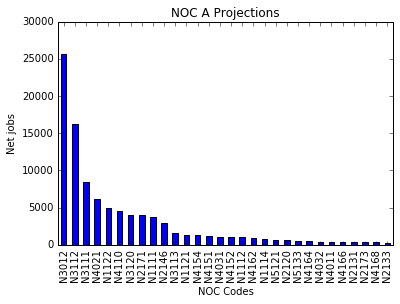

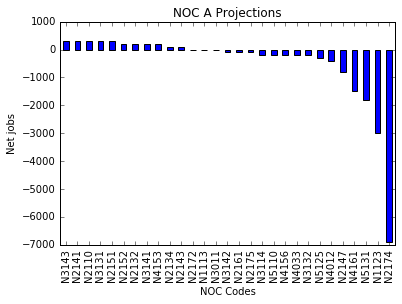

In [29]:
noc_A=all_skill_levels_sorted[all_skill_levels_sorted.NOC == "NOC A"]
noc_A_plot=noc_A['net_jobs']
goodGraphs(noc_A,noc_A_plot,'NOC A Projections',29)

([30, 30, 30, 30], 120)

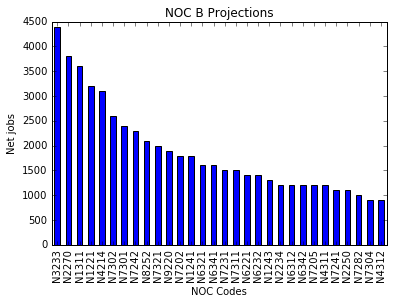

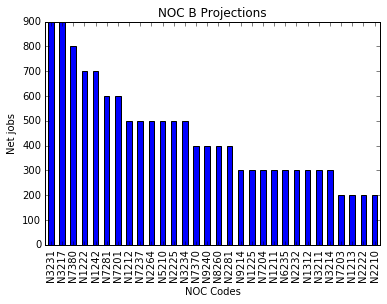

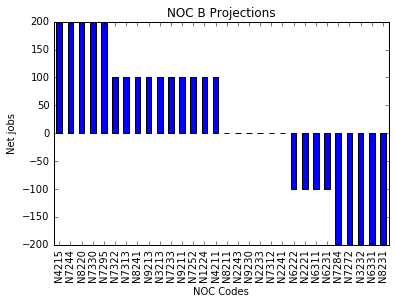

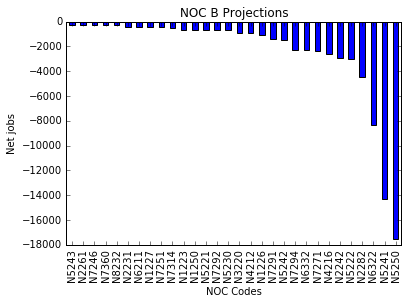

In [30]:
noc_B=all_skill_levels_sorted[all_skill_levels_sorted.NOC == "NOC B"]
noc_B_plot=noc_B['net_jobs']
goodGraphs(noc_B,noc_B_plot,'NOC B Projections',30)

([32, 32], 64)

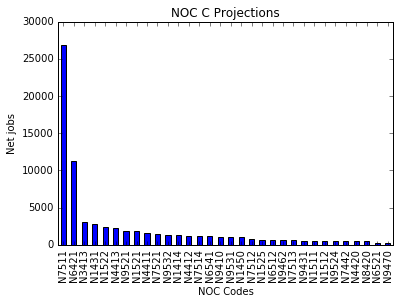

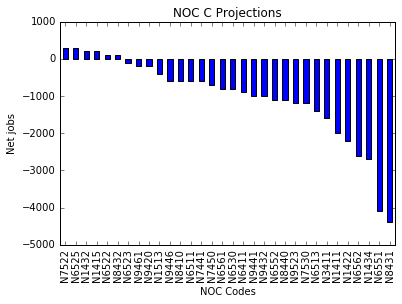

In [31]:
noc_C=all_skill_levels_sorted[all_skill_levels_sorted.NOC == "NOC C"]
noc_C_plot=noc_C['net_jobs']
goodGraphs(noc_C,noc_C_plot,'NOC C Projections',30)

([20], 20)

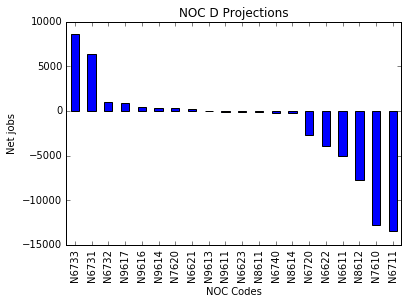

In [32]:
noc_D=all_skill_levels_sorted[all_skill_levels_sorted.NOC == "NOC D"]
noc_D_plot=noc_D['net_jobs']
goodGraphs(noc_D,noc_D_plot,'NOC D Projections',20)

([29, 29, 28, 28, 28, 28, 28], 198)

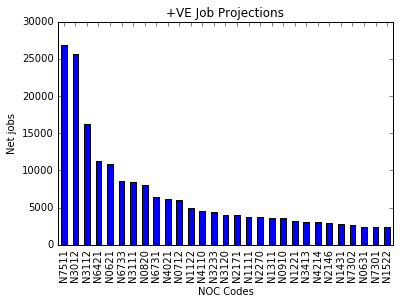

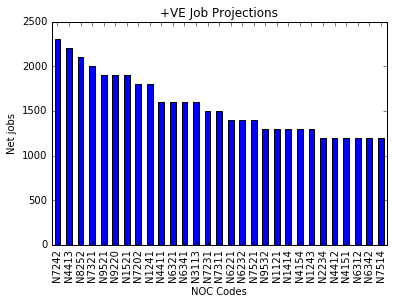

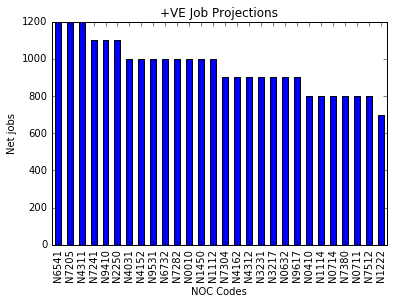

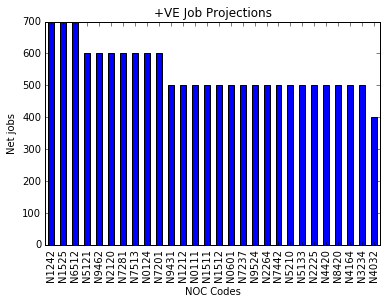

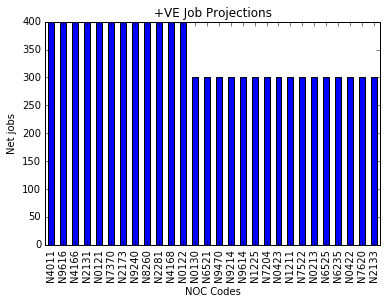

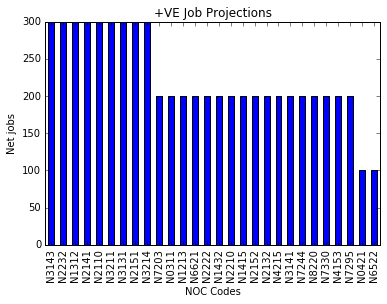

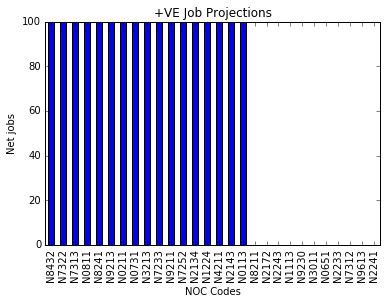

In [33]:
noc_pos=all_skill_levels_sorted[all_skill_levels_sorted.net_jobs >= 0]
noc_pos_plot=noc_pos['net_jobs']
goodGraphs(noc_pos,noc_pos_plot,'+VE Job Projections',28)


([32, 31, 31], 94)

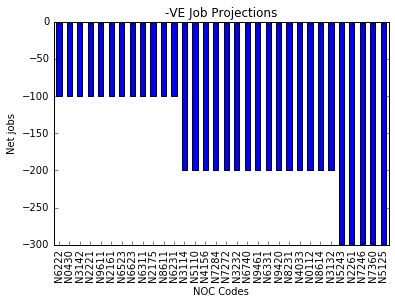

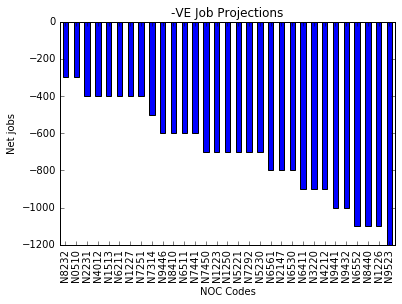

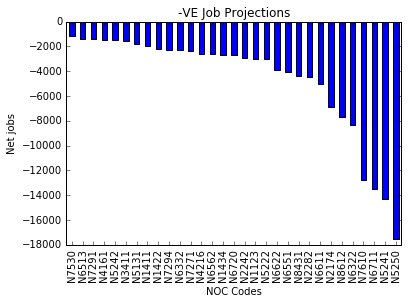

In [34]:
noc_neg=all_skill_levels_sorted[all_skill_levels_sorted.net_jobs < 0]
noc_neg_plot=noc_neg['net_jobs']
goodGraphs(noc_neg,noc_neg_plot,'-VE Job Projections',30)

([31, 30, 30, 30, 30], 151)

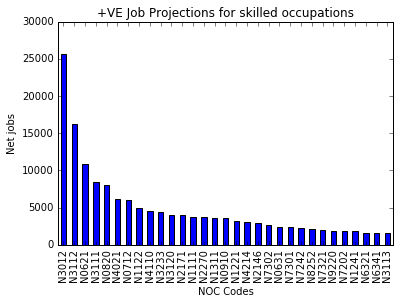

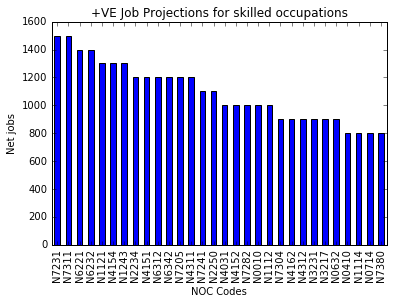

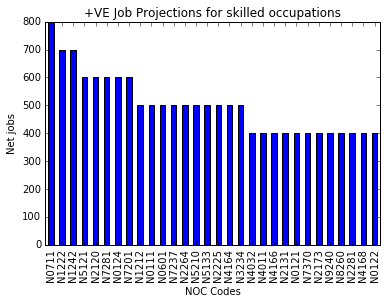

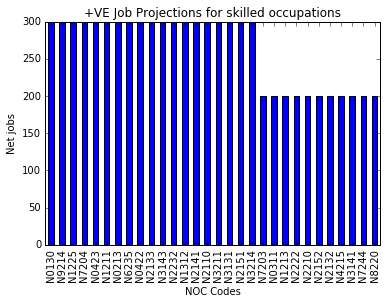

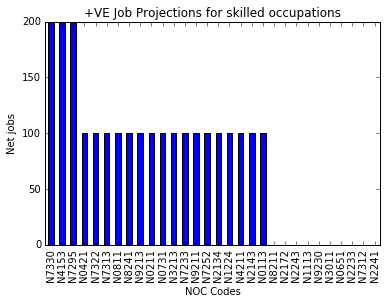

In [35]:
all_skilled=all_skill_levels_sorted[(all_skill_levels_sorted.NOC=='NOC 0')|(all_skill_levels_sorted.NOC=='NOC A')|(all_skill_levels_sorted.NOC=='NOC B')]

skilled_pos=all_skilled[all_skilled.net_jobs >= 0 ]
skilled_neg=all_skilled[all_skilled.net_jobs < 0 ]

skilled_pos_plot=skilled_pos['net_jobs']
goodGraphs(skilled_pos,skilled_pos_plot,'+VE Job Projections for skilled occupations',30)


([29, 28], 57)

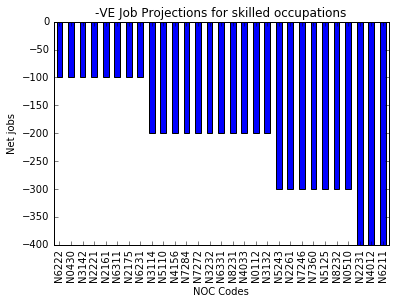

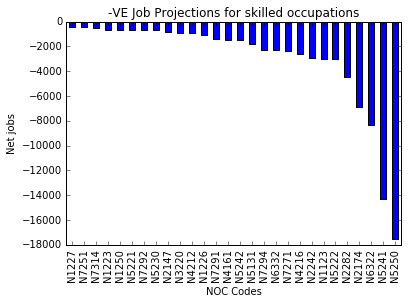

In [36]:
skilled_neg_plot=skilled_neg['net_jobs']
goodGraphs(skilled_neg,skilled_neg_plot,'-VE Job Projections for skilled occupations',25)